In [8]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
# 这里需要将dataroot改成自己的数据集下载目录。
nusc = NuScenes(version='v1.0-mini', dataroot='/media/hcq/hcq4T/dataset/nuScenes/v1.0-mini', verbose=True)



Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.361 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [9]:

# 1场景
# nusc.list_scenes() # 包含1000个场景的标注样本，每个场景约20s。

# 查看元数据
my_scene = nusc.scene[0] # 第一个场景
print("第0个场景num {}".format(len(nusc.scene)))
# print(my_scene['first_sample_token'])
first_sample_token = my_scene['first_sample_token'] #  'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',

my_sample = nusc.get('sample', first_sample_token) # sample.json  'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
my_sample # token，timestamp，data， data，  anns

第0个场景num 10


{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [3]:
my_annotation_token = my_sample['anns'][18] # 标注GT数据
print(len(my_sample['anns'])) # 69个标注信息（障碍物）
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)

print(my_annotation_metadata['size'], my_annotation_metadata['rotation'])
my_annotation_metadata



69
[2.877, 10.201, 3.595] [-0.5828819500503033, 0.0, 0.0, 0.812556848660791]


{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

In [11]:
import numpy as np
sizes = []
for anns_token in my_sample['anns']: # 遍历每个gt
    my_annotation_meta = nusc.get('sample_annotation', anns_token)
    sizes.append(my_annotation_meta['size'])
npdata=np.array(sizes)

print(npdata)

[[ 0.621  0.669  1.642]
 [ 0.775  0.769  1.711]
 [ 2.011  4.633  1.573]
 [ 0.752  0.819  1.637]
 [ 0.427  0.359  0.794]
 [ 0.689  1.77   1.709]
 [ 0.661  0.703  1.839]
 [ 1.837  4.32   1.631]
 [ 0.648  0.709  1.609]
 [ 1.977  0.703  1.149]
 [ 1.91   0.555  1.055]
 [ 1.019  0.915  1.67 ]
 [ 0.934  0.891  1.835]
 [ 0.8    0.908  1.835]
 [ 0.872  0.903  1.719]
 [ 1.964  0.694  1.131]
 [ 1.708  4.01   1.631]
 [ 0.79   0.741  1.725]
 [ 2.877 10.201  3.595]
 [ 2.135  4.956  2.17 ]
 [ 0.767  0.951  1.835]
 [ 1.967  0.704  0.962]
 [ 2.06   0.759  1.1  ]
 [ 1.993  0.744  1.245]
 [ 0.476  0.461  0.72 ]
 [ 1.969  0.716  1.092]
 [ 2.909  6.908  3.558]
 [ 0.803  0.87   1.78 ]
 [ 0.842  0.884  1.749]
 [ 1.99   0.726  0.921]
 [ 0.708  0.863  1.616]
 [ 0.734  0.775  1.821]
 [ 2.069  0.712  1.088]
 [ 0.733  0.746  1.695]
 [ 0.913  0.873  1.697]
 [ 2.05   0.693  1.081]
 [ 1.847  4.115  1.526]
 [ 1.977  0.764  1.144]
 [ 1.842  0.677  0.885]
 [ 0.793  1.     1.604]
 [ 1.939  4.819  1.736]
 [ 2.073  0.633 

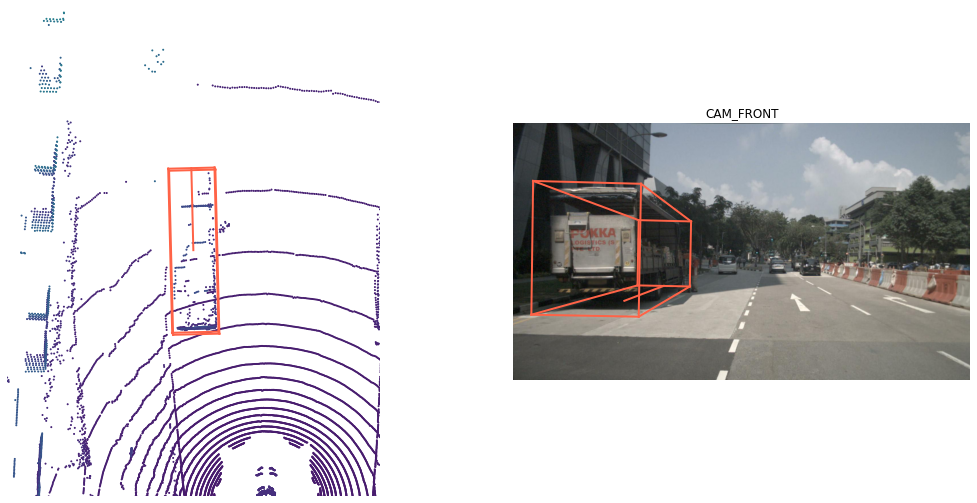

In [6]:
# 渲染注释以便于仔细观察：

nusc.render_annotation(my_annotation_token)
